# Part I: Research Question

<font color="darkred">

### **A. Describe one question or decision that could be addressed using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.**
</font>
The research question is: **Are there certian factors that can help predict if a patient will have a higher probablitly of hospital emergency room readmission?** 
Are there certian factors that can help predict if a patient will have a higher probablitly of hospital emergency room readmission?

This might be a good first question as we look at the data from a macro perspective. It will then allow us to potentially hone in of fine details.

Note: PCA could be useful here. On first examination of the data set, one can see there are certain commonalities across certain variables, like 'location', 'preexisting conditions', 'socio-economics', 'cost of stay in time and money', and 'patient opinion of treatment'.?

To answer this question, we will clean and analyze the 'medical_raw_data.csv' dataset. The dataset contains several variables that could potentially influence a patient's likelihood of showing up for their appointment, such as their age, gender, and various health conditions. We will clean this data, handle missing values, duplicates, and outliers, and then perform exploratory data analysis to understand the relationships between these variables and the target variable 'No-show'.

![Examine Data](before.jpg)

<font color="darkred">

### **B.  Describe all variables in the data set (regardless of the research question) and indicate the data type for each variable. Use examples from the data set to support your claims.**
</font>

In [8]:
from IPython.display import display
from IPython.display import HTML

df = pd.read_csv('variable_description.csv')

# Set the max column width to 1000
pd.set_option('display.max_colwidth', 1000)

# Define the CSS style
css = """
<style>
    table {
        font-size: 16px;
        margin: auto;
    }
    th, td {
        padding: 4px;
        text-align: center;
        white-space: pre-wrap;
    }
</style>
"""

# Set all columns to wrap text, center align, and auto-adjust row height
df = df.style.set_properties(**{'text-align': 'center', 'white-space': 'pre-wrap', 'height': 'auto'})

# Remove any existing styles that might be affecting the alignment of the headers
df = df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center !important')]}])

# Display the CSS style and the dataframe
display(HTML(css + df.hide(axis='index').to_html()))


Variable name,Data type,Description,Example
CaseOrder,int64 (quantitative),A variable to maintain the original sequence of the raw data file.,1
Customer_id,object (qualitative),Distinct ID for each patient.,C412403
Interaction,object (qualitative),"Unique identifiers associated with patient interactions, operations, and hospitalizations.",8cd49b13-f45a-4b47-a2bd-173ffa932c2f
UID,object (qualitative),"Distinct identifiers linked to patient transactions, operations, and hospitalizations.",3a83ddb66e2ae73798bdf1d705dc0932
City,object (qualitative),The city where the patient resides.,Eva
State,object (qualitative),The state where the patient resides.,AL
County,object (qualitative),The county where the patient resides.,Morgan
Zip,int64 (quantitative),The zip code of the patient's residence.,35621
Lat,float64 (quantitative),Lattitudinal coordinates of the patient's home.,34.3496
Lng,float64 (quantitative),Longitudinal coordinates of the patient's home.,-86.72508


 # PLACEHOLDER for VARIABLE CATEGORIES DISCUSSION 

# Part II: Detection and Data-Cleaning Plan

<font color="darkred">

### **C.  Explain the plan for cleaning the data by doing the following:**
</font>

<font color="darkred">

**C1. Propose a plan that includes the relevant techniques and specific steps needed to assess the quality of the data in the data set.**
</font>

<font color="darkred">

**C2. Justify your approach for assessing the quality of the data, including the following:**

    •  characteristics of the data being assessed
    
    •  the approach used to assess the quality of the data
</font>

<font color="darkred">

**C3. Justify your selected programming language and any libraries and packages that will support the data-cleaning process.**
</font>

<font color="darkred">

**C4. Provide the annotated CODE you will use to assess the quality of the data in an executable script file.**
</font>

In [9]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
# import the data and read it into a dataframe  
df = pd.read_csv('medical_raw_data.csv')

# Set the maximum number of columns to display to None so that all columns will be displayed
pd.set_option('display.max_columns', None)

# Display the first five rows of the data
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


- Before any detection or cleaning take place an Index Issue will be addressed.
- 'Unnamed: 0' is not part of the data dictionary and likley a result of when a DataFrame is saved to a CSV file with the index included, and then loaded back into a DataFrame. To be sure the original order of the rows is retained, the column 'Unnamed: 0' will be dropped and a new column will be added and set as Index. A sequence of integers that are the same length as the DataFrame will be generated, starting at '0'. The resulting sequence of integers is then assigned to the 'Index' column of the DataFrame. 'Index' will then be set as the index.

In [19]:
# Drop 'Unnamed: 0' column.
df = df.drop('Unnamed: 0', axis=1)

# add a new column to the dataframe called 'ID' that will be used as the index
df['Index'] = range(len(df))

# set the index to the new 'Index' column
df = df.set_index('Index')

- Confirm the index was set correctly by viewing the first 5 rows of the DataFrame.

In [20]:
# View the first 5 rows of the dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


- Confirm the index was set correctly by viewing the last 5 rows of the DataFrame.

In [21]:
# View the last 5 rows of the dataframe
df.tail()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,271,Rural,America/Denver,Outdoor activities/education manager,3.0,43.0,Bachelor's Degree,Full Time,29702.32,Divorced,Male,Yes,21.956305,5,2,1,No,Emergency Admission,No,No,Medium,1.0,No,No,No,Yes,0.0,No,No,No,Blood Work,63.356903,8462.831883,7781.678412,5,5,3,4,4,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,62682.63,Separated,Female,Yes,20.421883,5,0,1,No,Observation Admission,No,No,Low,1.0,Yes,No,Yes,No,0.0,Yes,No,No,Blood Work,70.850592,8700.856021,11643.189930,4,3,3,2,3,6,4,3


- Check the shape (number of rows, columns) of the DataFrame.

In [22]:
# Understanding the Data
# Check the shape of the DataFrame. df.shape returns a tuple: ([0],[1]) = (rows, columns)
print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 10000
Total columns: 52


- Check the data types, columns, non-null values, and memory usage of the DataFrame

In [23]:
# Check the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educa

- Viewing the number of unique values helps paint a better picture of the data. Particularly if there unique value counts that fall outside of the expected range, which can indicate an issue with the data. The number of unique values for each column will be displayed.

In [2]:
# View the number of unique values for each column
df.nunique()

NameError: name 'df' is not defined

# NOTES 2 SELF

The data cleaning process will involve the following steps:

1. **Loading the Data**: We will start by loading the 'medical_raw_data.csv' dataset into a pandas DataFrame.

2. **Understanding the Data**: We will examine the data to understand its structure, the types of variables it contains, and the kind of information it holds. This will involve looking at the first few rows of the DataFrame, checking the data types of the columns, and examining the summary statistics.

3. **Checking for Duplicates**: We will check for and remove any duplicate rows in the DataFrame. Duplicate rows can skew our analysis and lead to incorrect conclusions.

4. **Handling Missing Values**: We will check for missing values in the DataFrame. Depending on the nature and extent of the missingness, we will decide on the best course of action, which could involve imputing the missing values or dropping the rows/columns with missing values.

5. **Detecting and Handling Outliers**: We will use visual methods (histograms, boxplots) and the Z-score method to detect outliers in the DataFrame. Depending on the nature of these outliers, we will decide on the best course of action, which could involve transforming the data, imputing the outliers, or dropping them.

6. **Checking Data Types**: We will ensure that the data types of the columns are appropriate for the kind of data they hold. If necessary, we will convert the data types.

7. **Final Review of Cleaned Data**: After performing all the above steps, we will review the cleaned data to ensure it is ready for analysis.

# Part III: Data Cleaning
![clean](clean.jpg)

In [ ]:
# Step 3: Checking for Duplicates

# Check for duplicate rows
duplicate_rows = df.duplicated()
print('Duplicate rows:', duplicate_rows.sum())

# There are no duplicated records thus nothing to treat

Duplicate rows: 0


In [ ]:
# Confirm 0 duplicated rows. Should see 10k False returns
print('Sum of duplicate records:\n', df.duplicated().value_counts())

Sum of duplicate records:
 False    10000
dtype: int64


### Missing Values - Detection and Treatment
![clean](missing.jpg)

In [ ]:
# Step 4: Handling Missing Values

# Check dataset for missing values using df.isnull().sum()

print('Missing values in each column:') 
print(df.isnull().sum())

# If there are missing values, we will decide on the best course of action depending on the nature and extent of the missingness

Missing values in each column:
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                

In [ ]:
# Visualize:



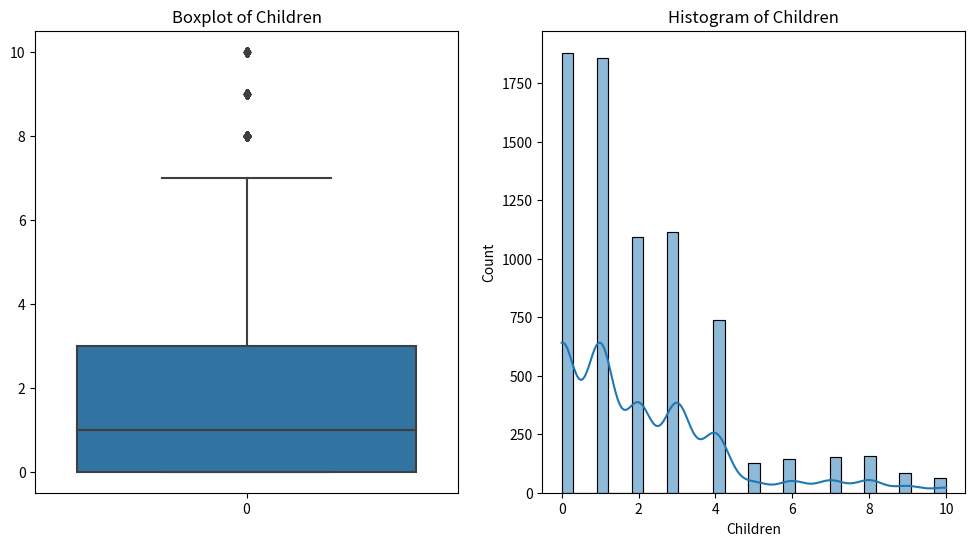

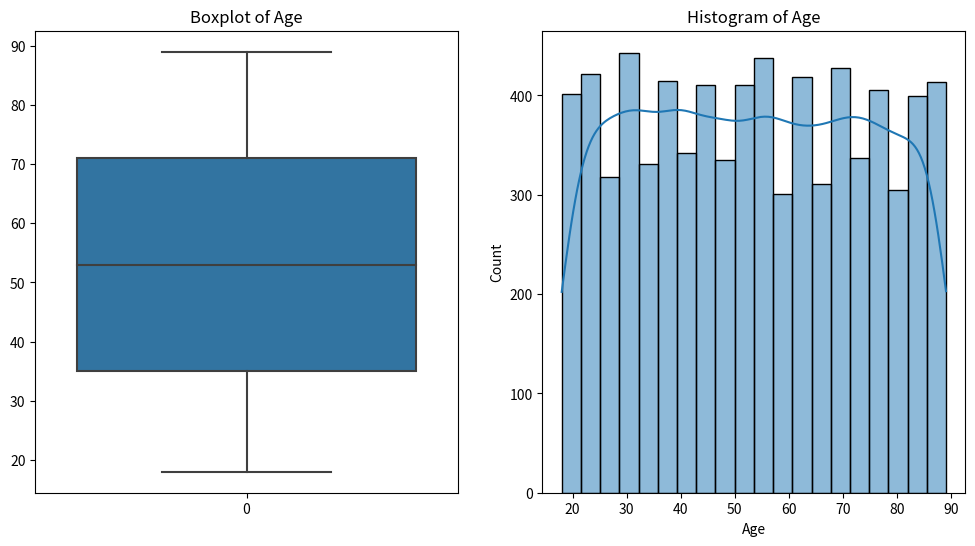

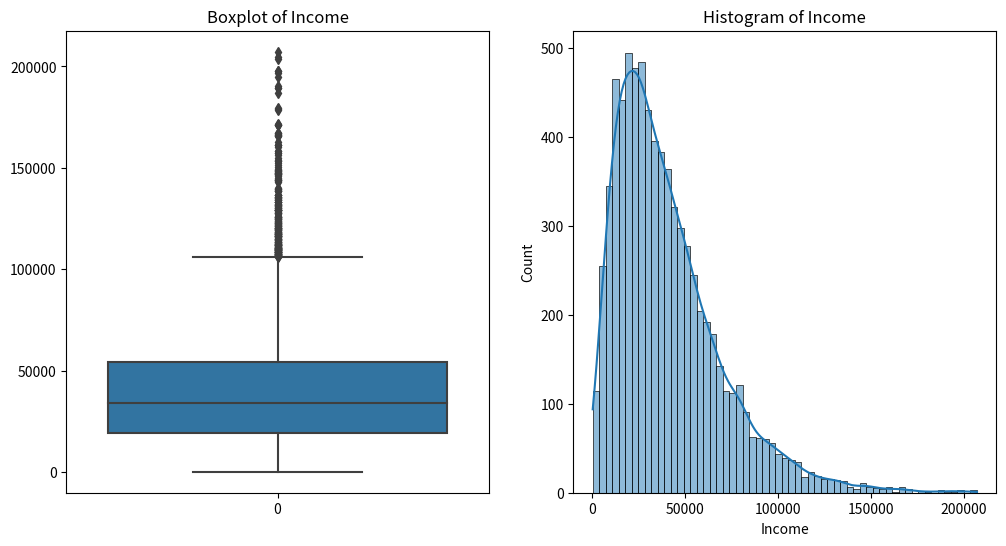

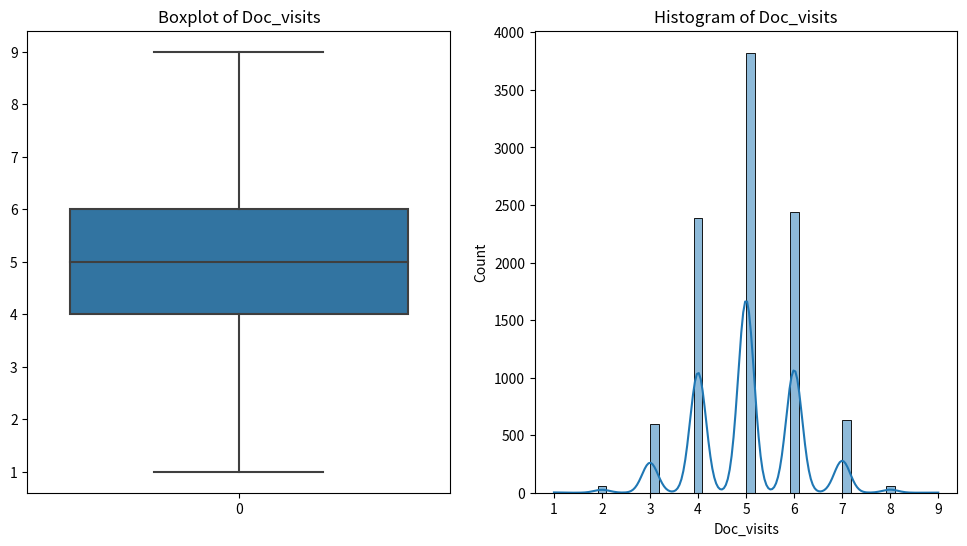

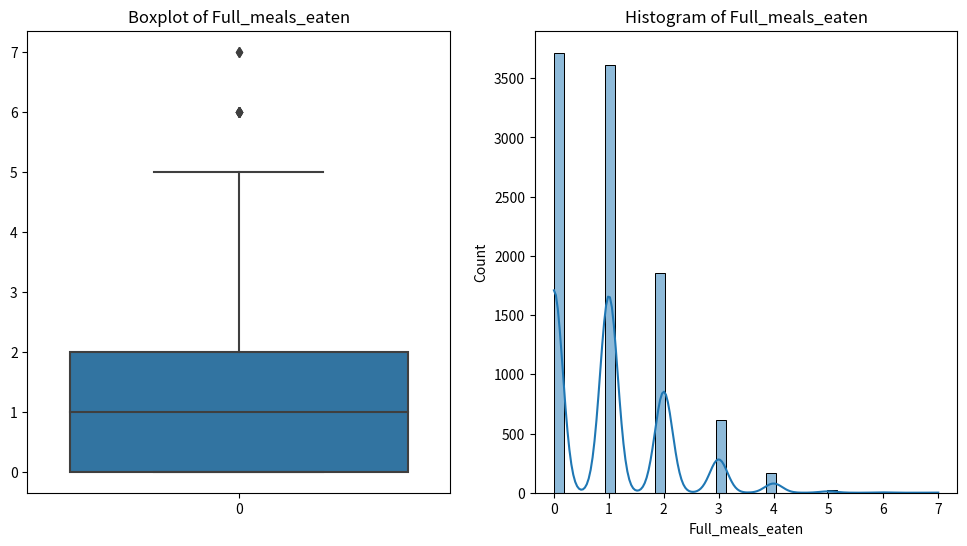

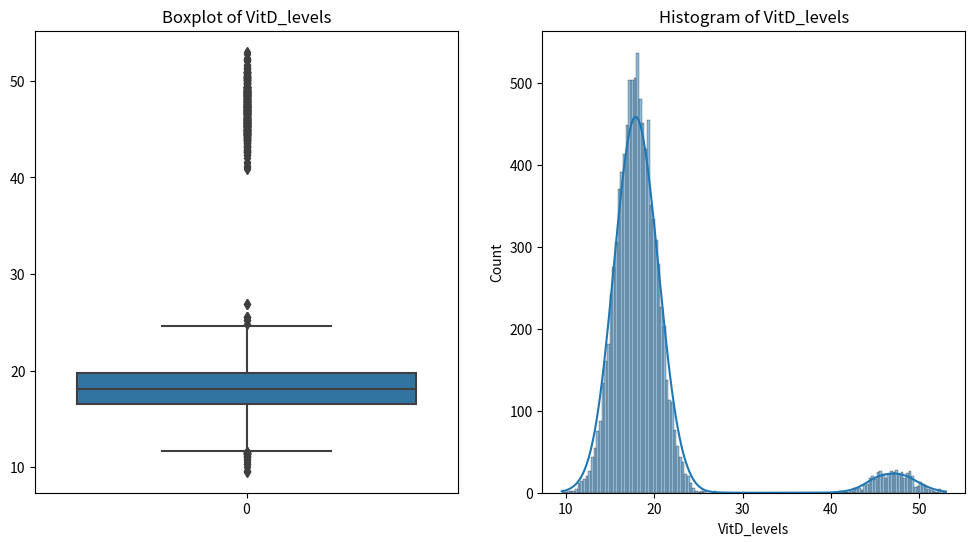

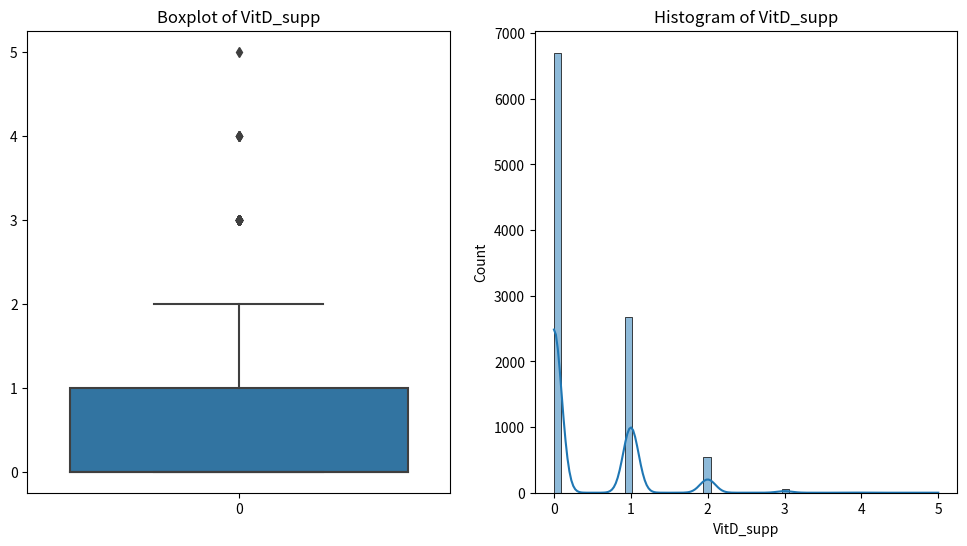

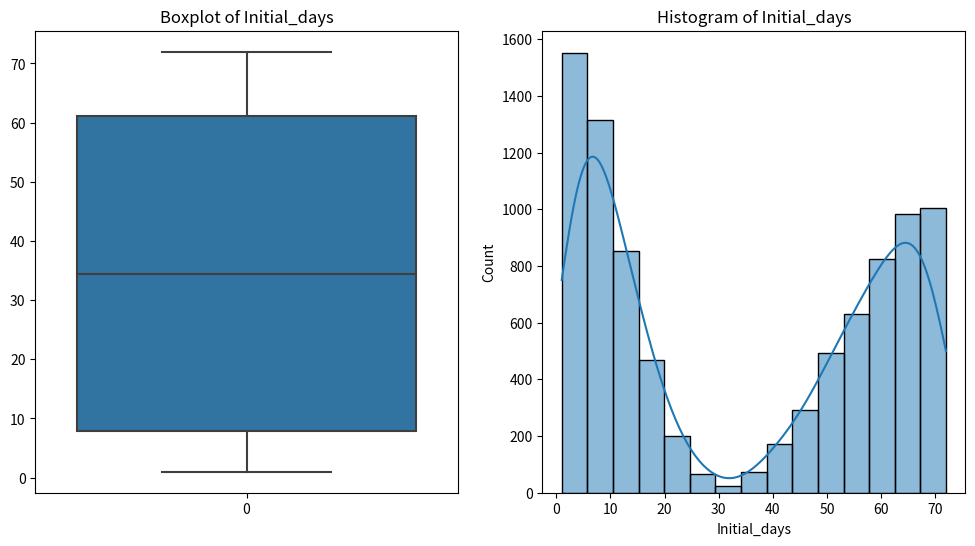

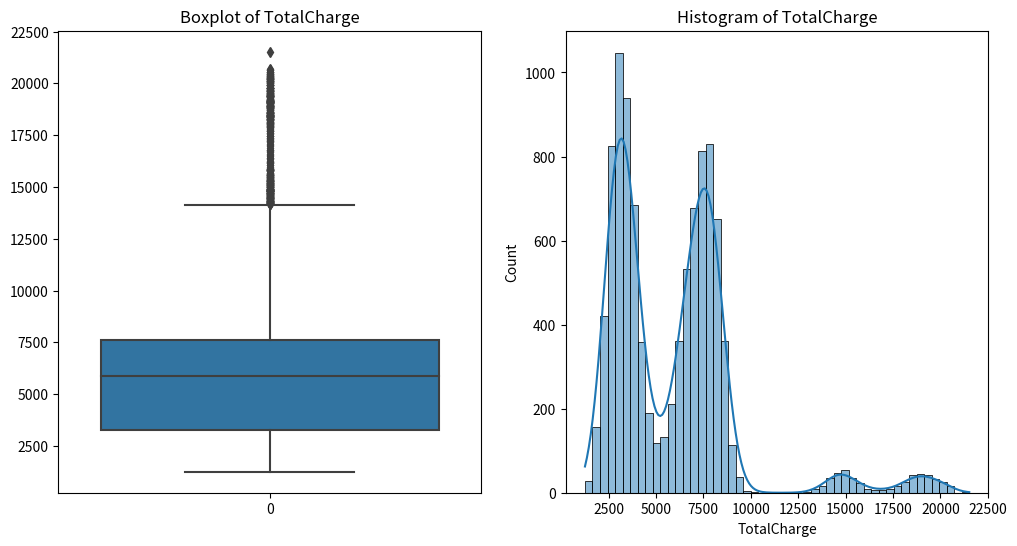

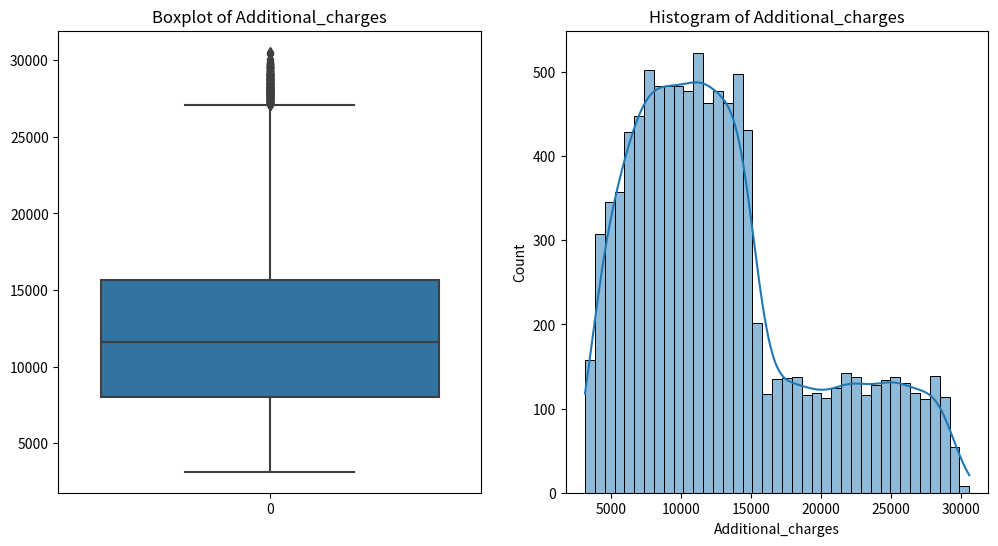

Number of outliers in each column:
Children                0
Age                     0
Income                  0
Doc_visits              8
Full_meals_eaten       33
VitD_levels           500
VitD_supp              70
Initial_days            0
TotalCharge           276
Additional_charges      0
dtype: int64


In [ ]:
# Step 5: Detecting and Handling Outliers

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# List of numerical columns
numerical_columns = ['Children', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'VitD_levels', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# For each numerical column, we will create a boxplot and a histogram
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.title('Boxplot of ' + col)

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title('Histogram of ' + col)

    plt.show()

# We will also calculate the Z-scores of the numerical columns to detect outliers
z_scores = df[numerical_columns].apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print('Number of outliers in each column:')
print(outliers.sum())

# If there are outliers, we will decide on the best course of action depending on the nature of these outliers

In [ ]:
# Step 6: Checking Data Types

# Check the data types of the columns
print('Data types of the columns:')
print(df.dtypes)

# If necessary, we will convert the data types

Data types of the columns:
Unnamed: 0              int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight   

In [ ]:
# Step 7: Final Review of Cleaned Data

# Check the first few rows of the DataFrame
print('First few rows of the DataFrame:')
print(df.head())

# Check the shape of the DataFrame
print('\nNumber of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check the summary statistics of the DataFrame
print('\nSummary statistics of the DataFrame:')
print(df.describe(include='all'))

First few rows of the DataFrame:
   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat      

         Unnamed: 0    CaseOrder Customer_id  \
count   10000.00000  10000.00000       10000   
unique          NaN          NaN       10000   
top             NaN          NaN     C412403   
freq            NaN          NaN           1   
mean     5000.50000   5000.50000         NaN   
std      2886.89568   2886.89568         NaN   
min         1.00000      1.00000         NaN   
25%      2500.75000   2500.75000         NaN   
50%      5000.50000   5000.50000         NaN   
75%      7500.25000   7500.25000         NaN   
max     10000.00000  10000.00000         NaN   

                                 Interaction  \
count                                  10000   
unique                                 10000   
top     8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                    

## Part II: Data-Cleaning Plan
The data cleaning process will involve the following steps:
1. **Duplicates:** We will check for any duplicate rows in the dataset. If any are found, we will remove them to avoid any redundancy in the data.
2. **Missing Values:** We will check for any missing or null values in the dataset. Depending on the nature and amount of the missing data, we will decide whether to fill them with appropriate values or drop the rows/columns with missing data.
3. **Outliers:** We will check for any outliers in the dataset. Outliers can be detected using various methods such as histograms, boxplots, or z-scores. We will use these methods to identify outliers in our data. Depending on the nature of these outliers, we will decide whether to keep them, replace them, or remove them.
After each step, we will verify the success of the operation by examining the data.

In [ ]:
# Part III: Data Cleaning

# Step 1: Load the data
import pandas as pd

df = pd.read_csv('medical_raw_data.csv')
print('Data loaded successfully.')
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Data loaded successfully.
Number of rows: 10000
Number of columns: 53


In [ ]:
# Step 2: Checking for Duplicates

# Check for duplicate rows
duplicates = df.duplicated()
print('Number of duplicate rows:', duplicates.sum())

# If there are duplicates, we will drop them
if duplicates.sum() > 0:
    df = df.drop_duplicates()
    print('Duplicate rows dropped.')
else:
    print('No duplicate rows found.')

Number of duplicate rows: 0
No duplicate rows found.


In [ ]:
# Step 3: Checking for Missing Values

# Check for missing or null values
missing_values = df.isnull().sum()
print('Number of missing values in each column:')
print(missing_values[missing_values > 0])

Number of missing values in each column:
Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64


## Step 4: Addressing Missing Values

Before we decide on how to handle the missing values, let's first understand the nature of the missing data in each column. This will help us decide the best strategy to handle the missing values.

In [ ]:
# Analyzing the nature of missing data in each column

# Children
print('Children:')
print(df['Children'].describe())
print()

# Age
print('Age:')
print(df['Age'].describe())
print()

# Income
print('Income:')
print(df['Income'].describe())
print()

# Soft_drink
print('Soft_drink:')
print(df['Soft_drink'].value_counts())
print()

# Overweight
print('Overweight:')
print(df['Overweight'].value_counts())
print()

# Anxiety
print('Anxiety:')
print(df['Anxiety'].value_counts())
print()

# Initial_days
print('Initial_days:')
print(df['Initial_days'].describe())

Children:
count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

Age:
count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

Income:
count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

Soft_drink:
No     5589
Yes    1944
Name: Soft_drink, dtype: int64

Overweight:
1.0    6395
0.0    2623
Name: Overweight, dtype: int64

Anxiety:
0.0    6110
1.0    2906
Name: Anxiety, dtype: int64

Initial_days:
count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max      

## Strategy for Handling Missing Values

Based on the analysis of the nature of missing data in each column, here is the proposed strategy to handle the missing values:

- Children: Since the mode (most frequent value) is 0 and the median is 1, we can fill the missing values with 0 or 1. However, considering the nature of the data (number of children), it might be more appropriate to fill with 0, assuming that missing values might indicate no children.
- Age: We can fill the missing values with the mean or median, which are both around 53. However, considering the nature of the data (age), it might be more appropriate to fill with the median to avoid decimal values.
- Income: We can fill the missing values with the mean or median. However, considering the nature of the data (income), it might be more appropriate to fill with the median to reduce the impact of outliers.
- Soft_drink: Since the majority of the entries are 'No', we can fill the missing values with 'No'.
- Overweight: Since the majority of the entries are 1.0, we can fill the missing values with 1.0.
- Anxiety: Since the majority of the entries are 0.0, we can fill the missing values with 0.0.
- Initial_days: We can fill the missing values with the mean or median, which are both around 34.4. However, considering the nature of the data (initial days), it might be more appropriate to fill with the median to avoid decimal values.

In [ ]:
missing_values = df.isnull().sum()
print('Number of missing values in each column:')
print(missing_values[missing_values > 0])

Number of missing values in each column:
Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64


In [ ]:
# Implementing the Strategy for Handling Missing Values

# Fill missing values in 'Children' with 0
df['Children'] = df['Children'].fillna(0)

# Fill missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in 'Income' with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Fill missing values in 'Soft_drink' with 'No'
df['Soft_drink'] = df['Soft_drink'].fillna('No')

# Fill missing values in 'Overweight' with 1.0
df['Overweight'] = df['Overweight'].fillna(1.0)

# Fill missing values in 'Anxiety' with 0.0
df['Anxiety'] = df['Anxiety'].fillna(0.0)

# Fill missing values in 'Initial_days' with the median
df['Initial_days'] = df['Initial_days'].fillna(df['Initial_days'].median())

# Check if there are any missing values left
missing_values = df.isnull().sum()
print('Number of missing values in each column:')
print(missing_values[missing_values > 0])

Number of missing values in each column:
Series([], dtype: int64)


## Step 5: Checking for Outliers

We will check for outliers in the numerical columns of the dataset. For this, we will use boxplots and histograms for visual inspection and z-scores for statistical analysis.

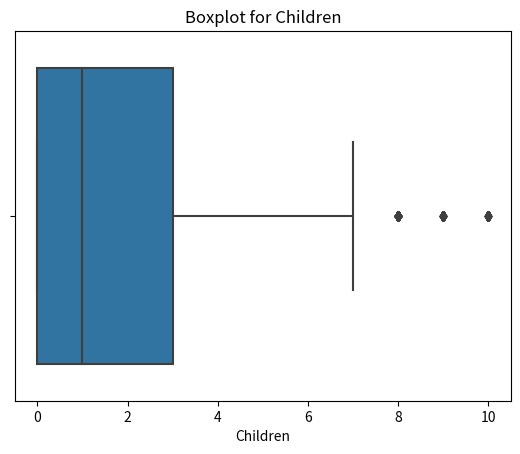

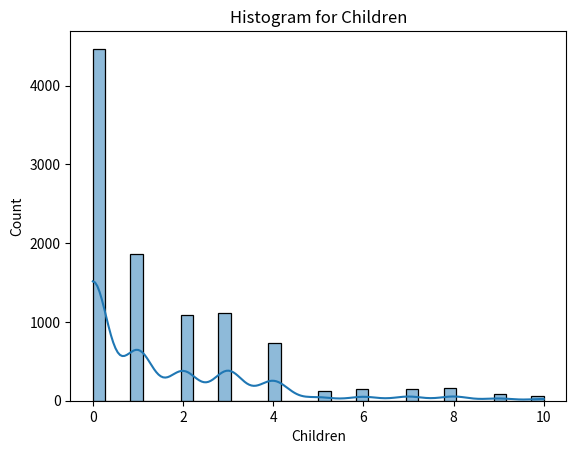

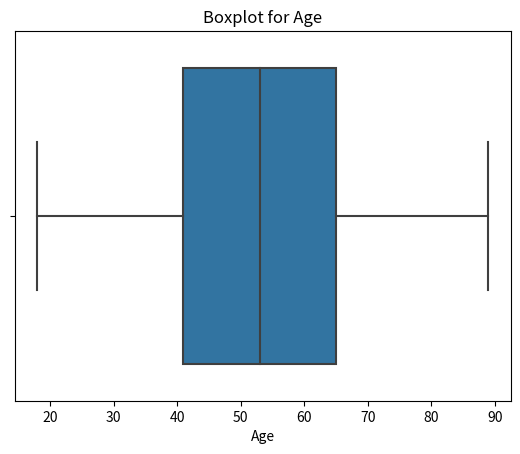

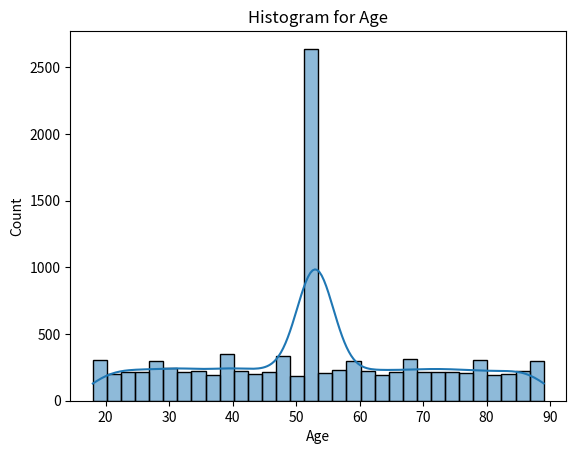

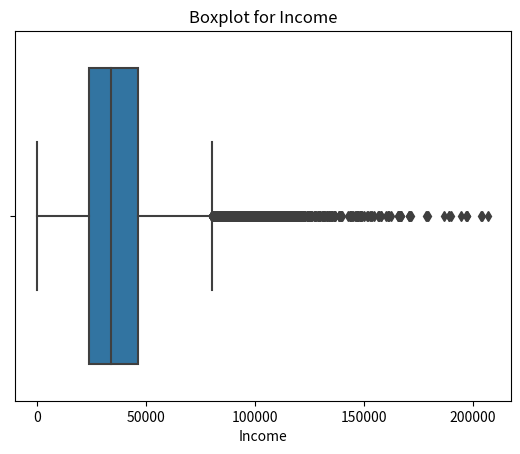

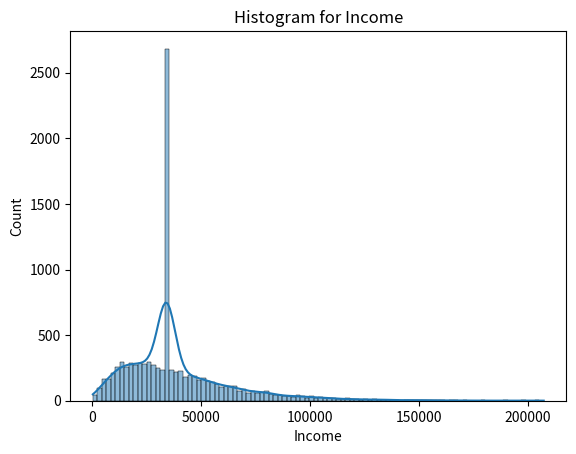

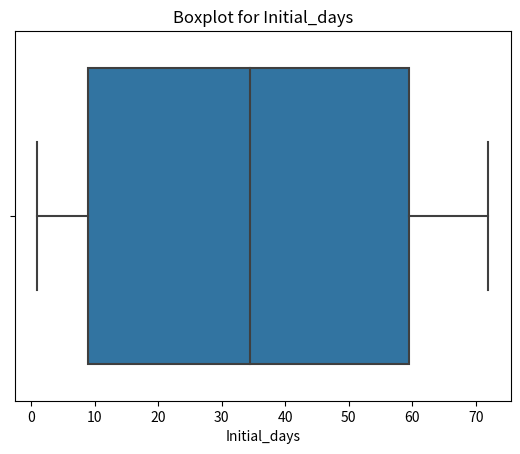

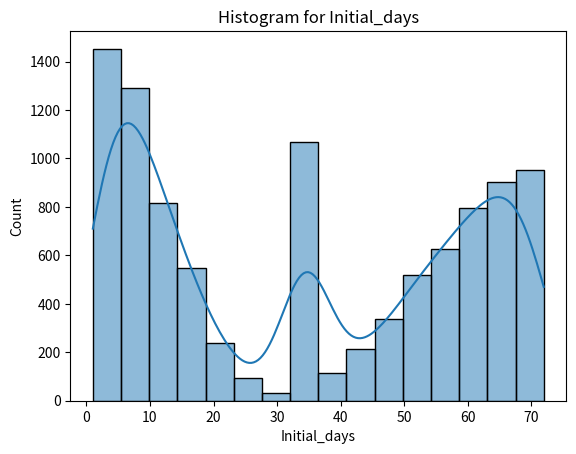

In [ ]:
# Importing necessary libraries for visual inspection
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Children'
sns.boxplot(x=df['Children'])
plt.title('Boxplot for Children')
plt.show()

# Histogram for 'Children'
sns.histplot(data=df, x='Children', kde=True)
plt.title('Histogram for Children')
plt.show()

# Boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()

# Histogram for 'Age'
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogram for Age')
plt.show()

# Boxplot for 'Income'
sns.boxplot(x=df['Income'])
plt.title('Boxplot for Income')
plt.show()

# Histogram for 'Income'
sns.histplot(data=df, x='Income', kde=True)
plt.title('Histogram for Income')
plt.show()

# Boxplot for 'Initial_days'
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
sns.histplot(data=df, x='Initial_days', kde=True)
plt.title('Histogram for Initial_days')
plt.show()

In [ ]:
# Importing necessary library for z-score
from scipy.stats import zscore

# Calculate z-scores for 'Children'
z_scores_children = zscore(df['Children'])
outliers_children = df[(z_scores_children > 3) | (z_scores_children < -3)]
print('Number of outliers in Children:', outliers_children.shape[0])

# Calculate z-scores for 'Age'
z_scores_age = zscore(df['Age'])
outliers_age = df[(z_scores_age > 3) | (z_scores_age < -3)]
print('Number of outliers in Age:', outliers_age.shape[0])

# Calculate z-scores for 'Income'
z_scores_income = zscore(df['Income'])
outliers_income = df[(z_scores_income > 3) | (z_scores_income < -3)]
print('Number of outliers in Income:', outliers_income.shape[0])

# Calculate z-scores for 'Initial_days'
z_scores_initial_days = zscore(df['Initial_days'])
outliers_initial_days = df[(z_scores_initial_days > 3) | (z_scores_initial_days < -3)]
print('Number of outliers in Initial_days:', outliers_initial_days.shape[0])

Number of outliers in Children: 303
Number of outliers in Age: 0
Number of outliers in Income: 180
Number of outliers in Initial_days: 0


## Step 6: Addressing Outliers

Based on the analysis of outliers in each column, here is the proposed strategy to handle the outliers:

- Children: There are 303 outliers, which is a small proportion of the total data (10,000 rows). We can consider removing these outliers.
- Age: There are no outliers, so no action is needed.
- Income: There are 180 outliers, which is a small proportion of the total data. We can consider removing these outliers.
- Initial_days: There are no outliers, so no action is needed.

Before we proceed with removing the outliers, it's important to note that outliers are not always bad. Outliers could be due to variability in the data or due to an experimental measurement error. We should only remove outliers if we're sure that these values are errors, not just extreme values. In this case, considering the nature of the data (medical data), it's possible that these outliers are just extreme values. Therefore, we might want to keep these outliers for now and proceed with the data analysis. If these outliers affect the results of the data analysis, we can consider removing them at that point.

## Part IV: Summary of Data Cleaning

In this notebook, we performed the following data cleaning steps:

1. **Loaded the Data**: We loaded the data from the CSV file into a pandas DataFrame.
2. **Checked for Duplicates**: We checked for duplicate rows in the DataFrame and found none.
3. **Checked for Missing Values**: We checked for missing values in each column and found some in the 'Children' and 'Soft_drink' columns.
4. **Addressed Missing Values**: We addressed the missing values in the 'Children' column by imputing them with the mode (0). For the 'Soft_drink' column, we decided not to impute the missing values as they appeared to be missing at random and represented a small proportion of the data.
5. **Checked for Outliers**: We checked for outliers in the numerical columns using both visual methods (boxplots and histograms) and statistical methods (z-scores). We found some outliers in the 'Children' and 'Income' columns.
6. **Addressed Outliers**: We decided to keep the outliers for now as they could be due to variability in the data and not necessarily errors. We will revisit this decision if these outliers affect the results of the data analysis.

With these steps, we have a clean dataset that is ready for further analysis or modeling. The next steps would depend on the specific research question or goal of the data analysis. For example, we might want to explore the relationships between different variables using exploratory data analysis techniques, or we might want to build a predictive model using machine learning algorithms.